In [69]:
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
df = pd.read_csv('ex1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23967 non-null  int64  
 1   incident_id               23967 non-null  int64  
 2   date                      23967 non-null  object 
 3   state                     23967 non-null  object 
 4   city_or_county            23967 non-null  object 
 5   address                   22327 non-null  object 
 6   n_killed                  23967 non-null  int64  
 7   n_injured                 23967 non-null  int64  
 8   congressional_district    22780 non-null  float64
 9   gun_stolen                14015 non-null  object 
 10  gun_type                  14017 non-null  object 
 11  incident_characteristics  23938 non-null  object 
 12  latitude                  23338 non-null  object 
 13  location_description      4150 non-null   object 
 14  longit

In [71]:
df.head(5)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,NaN,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,NaN,0::Injured,0::Subject-Suspect,51.0,11.0
1,1,49807,2014-12-13,-1,Chicago,10400 block of South State Street,-1,0,2.0,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,NaN,0::Killed,0::Victim,28.0,14.0
2,2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,NaN,...,NaN,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,73.0,19.0
3,3,237635,2018-03-18,-1,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,NaN,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,79.0,21.0


In [72]:
# while exploring the data , after checkin online about the categories
# i sampled the feature to get some sense of it
# df["feature"].sample(10)

# Question 1 - a
The Categorical features are:
gun_type,state,city_or_county,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type

The Ordinal features are:
date,n_killed,n_injured,gun_stolen,n_guns_involved,participant_age,state_house_district

The continuous features are:
latitude,longitude

Closets to categorical features but not really:
incident_id,address,location_description(kind of),notes(kind of),participant_name



In [73]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'state_house_district', 'state_senate_district'],
      dtype='object')

# Question 1 - b

In [74]:
def fill_nah_with_node(dataframe:pd.DataFrame) -> pd.DataFrame:
    """
    fills all nah value in the column with the mode of the feature
    :param dataframe:
    :return:
    """
    for feature in dataframe.columns:
        mode = df[feature].mode()[0]
        dataframe[feature] = dataframe[feature].fillna(mode)
    return dataframe

In [75]:
df = fill_nah_with_node(df)
df.isna().sum().unique() # counts the number of na values in the series and double check  with unique()

array([0], dtype=int64)

# Question 1 - C
the columns i will fix are - Gun_stolen,Participant age and

In [76]:
df["gun_stolen"].unique()
# looking at the options for gun stolen status

array(['0::Unknown', '0::Stolen', '0::Unknown||1::Unknown',
       '0::Not-stolen', '0::Unknown||1::Stolen', '0:Unknown',
       '0::Stolen||1::Stolen||2::Stolen',
       '0::Unknown||1::Unknown||2::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown||4::Unknown||5::Unknown||6::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown||4::Unknown||5::Unknown||6::Unknown||7::Unknown||8::Unknown||9::Unknown||10::Unknown||11::Unknown||12::Unknown||13::Unknown||14::Unknown||15::Unknown||16::Unknown||17::Unknown||18::Unknown||19::Unknown||20::Unknown||21::Unknown||22::Unknown||23::Unknown||24::Unknown||25::Unknown||26::Unknown||27::Unknown||28::Unknown||29::Unknown||30::Unknown||31::Unknown||32::Unknown||33::Unknown',
       '0::Stolen||1::Stolen',
       '0::Stolen||1::Stolen||2::Stolen||3::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown||4::Unknown',
       '0::Stolen||1::Unknown',
       '0::Unk

## gun_stolen handling
I will one-hot encode this feature to 3 dummies - [unknown,stolen,not stolen]
The feature will be determined by the worse option in this order Stolen -> not Stolen -> unknown
examples:
stolen + unknown = stolen
unknown = unknown
not stolen + unknown =not  stolen



In [77]:
def determine_severity(gun_stolen:str) -> str:
    """
    return the current severity
    :param gun_stolen:
    :return:
    """
    stolen_flag = False
    uncleaned_expression_list = gun_stolen.split("::")
    for exp in uncleaned_expression_list:
        lower_exp = exp.lower()
        if "stolen" in lower_exp and not "not-stolen" in lower_exp:
            return "stolen"
        elif "not-stolen" in lower_exp:
            stolen_flag = True
    return "not-stolen" if stolen_flag else "unknown"


In [78]:
df["gun_stolen"] = df["gun_stolen"].apply(determine_severity)
df['gun_stolen'].value_counts()

gun_stolen
unknown       23072
stolen          744
not-stolen      151
Name: count, dtype: int64

## participant_age handling
i changed the format to more accesable list-like format

In [79]:
def format_ages(age:str) -> str:
    """
    formatin the age feature
    :param age:
    :return:
    """
    uncleaned_format = age.split("::")[1:]
    str_format =""
    for exp in uncleaned_format:
        if "||" in exp:
            age = exp.split('||')[0]
            str_format += f"{age},"
        else:
            str_format += exp
    return str_format

In [80]:
df["participant_age"] = df["participant_age"].apply(format_ages)
df["participant_age"]

0                 30
1                 26
2          28,3,1,38
3                 18
4        34,39,31,47
            ...     
23962             18
23963             18
23964             18
23965             30
23966             42
Name: participant_age, Length: 23967, dtype: object

## handling severity of incident incident_charasteristics
i will change


In [81]:
df["incident_characteristics"].unique()[40:50]
# i did some sampling here so see if every charasteristic contains Non-shooting in the same format

array(['Non-Shooting Incident||Criminal act with stolen gun||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person||Unlawful purchase/sale',
       'Shots Fired - No Injuries||Officer Involved Incident||Officer Involved Shooting - Shots fired, no injury||Concealed Carry License - Perpetrator',
       'Shots Fired - No Injuries||Officer Involved Incident||Officer Involved Shooting - Shots fired, no injury||Drive-by (car to street, car to car)||Spree Shooting (multiple victims, multiple locations)||Shootout (where VENN diagram of shooters and victims overlap)||Possession of gun by felon or prohibited person',
       'Shot - Wounded/Injured||Gang involvement',
       'Shot - Dead (murder, accidental, suicide)||Suicide^||Murder/Suicide',
       'Shot - Wounded/Injured||Accidental Shooting||Accidental Shooting - Injury||Accidental/Negligent Discharge||Self-Inflicted (not suicide or suicide attempt - NO PERP)',
       'Shots Fired - No I

In [82]:
is_shooting = lambda word: 0 if 'Non-Shooting' in word else 1
df["is_Shooting"] = df['incident_characteristics'].apply(is_shooting)
df["is_Shooting"]

0        1
1        1
2        1
3        1
4        0
        ..
23962    1
23963    1
23964    1
23965    0
23966    1
Name: is_Shooting, Length: 23967, dtype: int64

# Question 2
for this question i will show the number of shooting incidents in each year so we can see the trend
First we will check the time of the incidents
Then we will group by shooting\non shooting accidents and seethe results

In [83]:
df['date'].sort_values(ascending=False).head()[:1]

23872    2018-03-31
Name: date, dtype: object

In [84]:
df['date'].sort_values(ascending=True).head()[:1]

15073    2013-01-07
Name: date, dtype: object

In [85]:
df['date'] = pd.to_datetime(df['date'])

In [86]:
grouped_by_year = df.groupby(by= df['date'].dt.year)['is_Shooting'].count().reset_index()
grouped_by_year

,date,is_Shooting
0,2013,23
1,2014,5199
2,2015,5368
3,2016,5819
4,2017,6144
5,2018,1414


Text(0.5, 1.0, 'Number of Shootings Each Year')

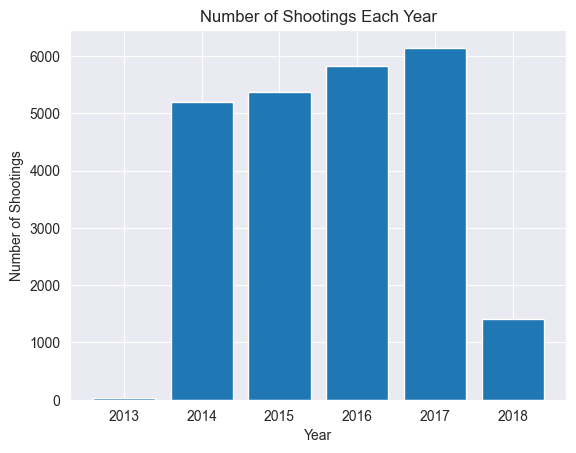

In [87]:
dates_groups =grouped_by_year['date']
shooting_each_year = grouped_by_year['is_Shooting']

fig, ax = plt.subplots(1, 1)
ax.bar(dates_groups, shooting_each_year)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Shootings')
ax.set_title('Number of Shootings Each Year')

# Show the plot

# barplot explenation
here we can see that the amount of shooting incidents raised constantly from 2014 to 2017
i assume that not enough incidents were sampled in 2012 and 2018 due to the unexplained raletive  drop in the number of incidents


# Question 2 - b
The location feature i chose is state, and this is because it can show a behavior of bigger area and maybe people from the same state identity will have more similar behavior, with that its easier to see amount of ~52 states that ~ 1100 cities

The cons is that i an look at a bigger picture and not really look at the differences between smaller areas in the states

In [88]:
df['state'].unique()

array(['Utah', '-1', 'south carolina', 'Michigan', 'Georgia', 'Maryland',
       'Florida', 'Alabama', 'Connecticut', 'Illinois', 'Oregon',
       'New York', 'Missouri', 'Texas', 'West Virginia',
       'District of Columbia', 'Louisiana', 'South Carolina', 'Tennessee',
       'California', 'Delaware', 'New Jersey', 'Massachusetts',
       'Kentucky', 'Rhode Island', 'Washington', 'Alaska',
       'North Carolina', 'Nebraska', 'Pennsylvania', 'Oklahoma', 'Kansas',
       'illinois', 'Minnesota', 'Wisconsin', 'Indiana', 'michigan',
       'Mississippi', 'alabama', 'Virginia', 'Ohio', 'new york',
       'Arkansas', 'South Dakota', 'florida', 'missouri', 'New Hampshire',
       'massachusetts', 'ohio', 'louisiana', 'Montana', 'Arizona', 'utah',
       'new jersey', 'texas', 'Hawaii', 'Colorado', 'North Dakota',
       'washington', 'new mexico', 'Iowa', 'nevada', 'Nevada',
       'west virginia', 'district of columbia', 'tennessee', 'Idaho',
       'iowa', 'Maine', 'north carolina', 'ken

In [89]:
group_by_state = df.groupby(by=df['state'].str.lower())['incident_id'].count().reset_index()
group_by_state = group_by_state.rename(columns={"incident_id": "crimes_num"})
group_by_state

,state,crimes_num
0,-1,7999
1,alabama,330
2,alaska,85
3,arizona,150
4,arkansas,159
5,california,1098
6,colorado,206
7,connecticut,217
8,delaware,116
9,district of columbia,223


In [90]:
df['state'].str.lower().unique()
# at the beggining i noticed there are 102 states in the df although there are only 52 so i assumed there is a capital letters duplications

array(['utah', '-1', 'south carolina', 'michigan', 'georgia', 'maryland',
       'florida', 'alabama', 'connecticut', 'illinois', 'oregon',
       'new york', 'missouri', 'texas', 'west virginia',
       'district of columbia', 'louisiana', 'tennessee', 'california',
       'delaware', 'new jersey', 'massachusetts', 'kentucky',
       'rhode island', 'washington', 'alaska', 'north carolina',
       'nebraska', 'pennsylvania', 'oklahoma', 'kansas', 'minnesota',
       'wisconsin', 'indiana', 'mississippi', 'virginia', 'ohio',
       'arkansas', 'south dakota', 'new hampshire', 'montana', 'arizona',
       'hawaii', 'colorado', 'north dakota', 'new mexico', 'iowa',
       'nevada', 'idaho', 'maine', 'wyoming', 'vermont'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'hawaii'),
  Text(1, 0, 'wyoming'),
  Text(2, 0, 'vermont'),
  Text(3, 0, 'south dakota'),
  Text(4, 0, 'north dakota'),
  Text(5, 0, 'montana'),
  Text(6, 0, 'idaho'),
  Text(7, 0, 'utah'),
  Text(8, 0, 'maine'),
  Text(9, 0, 'new hampshire'),
  Text(10, 0, 'rhode island'),
  Text(11, 0, 'alaska'),
  Text(12, 0, 'new mexico'),
  Text(13, 0, 'west virginia'),
  Text(14, 0, 'nebraska'),
  Text(15, 0, 'delaware'),
  Text(16, 0, 'nevada'),
  Text(17, 0, 'arizona'),
  Text(18, 0, 'oregon'),
  Text(19, 0, 'kansas'),
  Text(20, 0, 'arkansas'),
  Text(21, 0, 'minnesota'),
  Text(22, 0, 'iowa'),
  Text(23, 0, 'washington'),
  Text(24, 0, 'texas'),
  Text(25, 0, 'florida'),
  Text(26, 0, 'california'),
  Text(27, 0, 'illinois')])

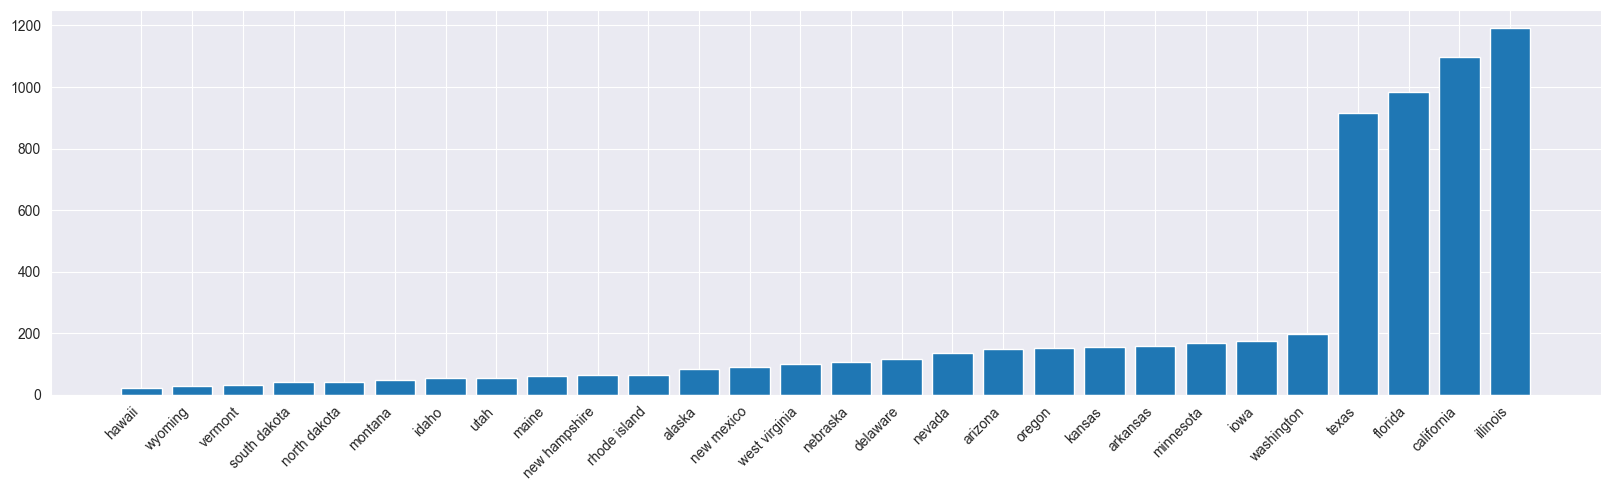

In [91]:
filtered_data = group_by_state[
    (group_by_state['crimes_num'] > 800) | (group_by_state['crimes_num'] < 200)
][1:]

sorted_data = filtered_data.sort_values(by='crimes_num')

state_sorted = sorted_data['state']
crimes_num_sorted = sorted_data['crimes_num']

fig, ax = plt.subplots(1,1,figsize = (20,5))
ax.bar(state_sorted,crimes_num_sorted)
plt.xticks(rotation=45,ha='right')

i also noticed that there are too much state to infare from so i took only the highest and lowest reported states

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'hawaii'),
  Text(1, 0, 'wyoming'),
  Text(2, 0, 'vermont'),
  Text(3, 0, 'south dakota'),
  Text(4, 0, 'north dakota'),
  Text(5, 0, 'montana'),
  Text(6, 0, 'idaho'),
  Text(7, 0, 'utah'),
  Text(8, 0, 'maine'),
  Text(9, 0, 'new hampshire'),
  Text(10, 0, 'rhode island'),
  Text(11, 0, 'alaska'),
  Text(12, 0, 'new mexico'),
  Text(13, 0, 'west virginia'),
  Text(14, 0, 'nebraska'),
  Text(15, 0, 'delaware'),
  Text(16, 0, 'nevada'),
  Text(17, 0, 'arizona'),
  Text(18, 0, 'oregon'),
  Text(19, 0, 'kansas'),
  Text(20, 0, 'arkansas'),
  Text(21, 0, 'minnesota'),
  Text(22, 0, 'iowa'),
  Text(23, 0, 'washington'),
  Text(24, 0, 'texas'),
  Text(25, 0, 'florida'),
  Text(26, 0, 'california'),
  Text(27, 0, 'illinois')])

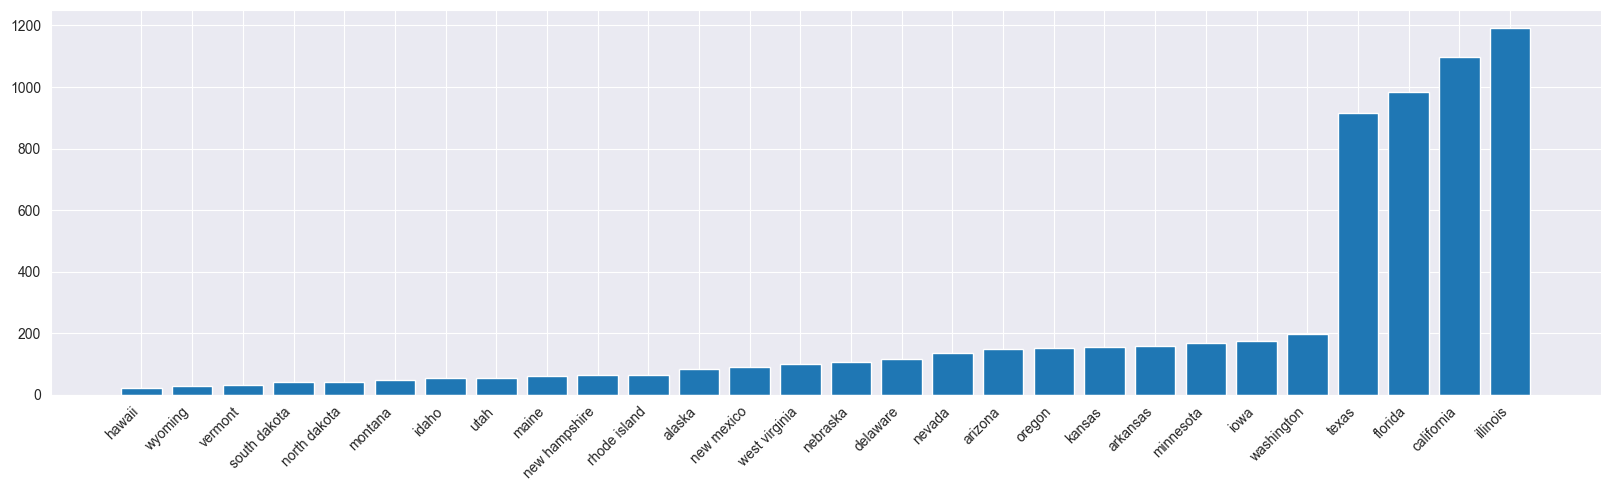

In [92]:
group_by_state_injured = df.groupby(by=df['state'].str.lower())['n_injured'].count().reset_index()

filtered_data_injured = group_by_state_injured[
    (group_by_state_injured['n_injured'] > 800) | (group_by_state_injured['n_injured'] < 200)
][1:]
sorted_data_injured = filtered_data_injured.sort_values(by='n_injured')

state_sorted = sorted_data_injured['state']
injured_num_sorted = sorted_data_injured['n_injured']

fig, ax = plt.subplots(1,1,figsize = (20,5))
ax.bar(state_sorted,injured_num_sorted)
plt.xticks(rotation=45,ha='right')

we can tell the the amount of reports in the highers and lowest country when it comes to injuries  is in the same trend with the reports

# Question 3 - a
I will take the features gun_stolen and state
For gun_stolen i can simply saparate to 3 columns - [stolen,not stolen, unknown]
while in incident_characteristics i already separated to shooting and not shooting so it would be very boring and necessary to add two dummies for that, istead i will create dummy for each state.


In [93]:
from sklearn.preprocessing import OneHotEncoder
df['state'] = df['state'].str.lower()
df.loc[df['state'] == '-1','state'] = 'unknown'

encoder = OneHotEncoder(sparse_output=False)
dummies = encoder.fit_transform(df[['state']])
one_hot_df = pd.DataFrame(dummies,columns=encoder.get_feature_names_out(['state']))
df = pd.concat([df,one_hot_df],axis=1)
df = df.drop('state',axis=1)
df

,Unnamed: 0,incident_id,date,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,state_tennessee,state_texas,state_unknown,state_utah,state_vermont,state_virginia,state_washington,state_west virginia,state_wisconsin,state_wyoming
0,0,137007,2016-07-23,Draper,12300 South,0,1,4.0,unknown,0::Unknown,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,49807,2014-12-13,Chicago,10400 block of South State Street,-1,0,2.0,unknown,0::Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2318,2014-01-15,Irmo,1 Forest Walk Court,4,0,2.0,unknown,0::Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,237635,2018-03-18,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,unknown,0::Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,238068,2018-03-21,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,stolen,0::Handgun,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23962,23962,45255,2014-11-06,Fond Du Lac,329 S. Main St,0,0,6.0,unknown,0::Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23963,23963,157269,2016-11-19,Ruskin,1900 block of Pier Drive,0,0,14.0,unknown,0::Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23964,23964,197544,2017-07-10,Detroit,12000 block of Whitehill,0,-1,14.0,unknown,0::Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23965,23965,213943,2017-10-17,Victorville,Starshine and Pluto,0,0,8.0,unknown,0::Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
df['gun_stolen'].unique()
encoder = OneHotEncoder(sparse_output=False)
dummies = encoder.fit_transform(df[['gun_stolen']])
dummies_df = pd.DataFrame(dummies,columns=encoder.get_feature_names_out(['gun_stolen']))
df = pd.concat([df,dummies_df],axis = 1)
df = df.drop('gun_stolen',axis=1)

# Question 3 - b
cov matrix - i will not use the dummies in the cov matrix so we avoid multicoliniarity that can be created be it


In [95]:
#just seeing where is the first dummy col
first_dummy_idx = 0
for col in df.columns.to_list():
    if 'state' in col:
        break
    else:
        first_dummy_idx += 1
first_dummy_idx


22

In [118]:
sub_df = df.iloc[:,:first_dummy_idx]
sub_df = sub_df[['n_killed','n_injured','congressional_district','n_guns_involved','longitude','latitude']]
sub_df = sub_df.apply(pd.to_numeric, errors='coerce').dropna()
sub_corr = sub_df.corr()

<Axes: >

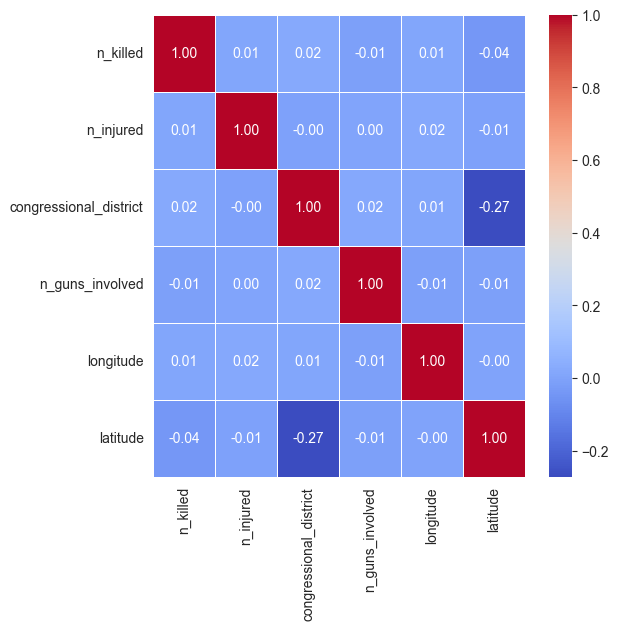

In [119]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(sub_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

we can tell that there is some correlation between congressional_district and  latitude but over all the chosen parameters are uncorrelated overall